# **Assignment: Fine-Tuning a Large Language Model**

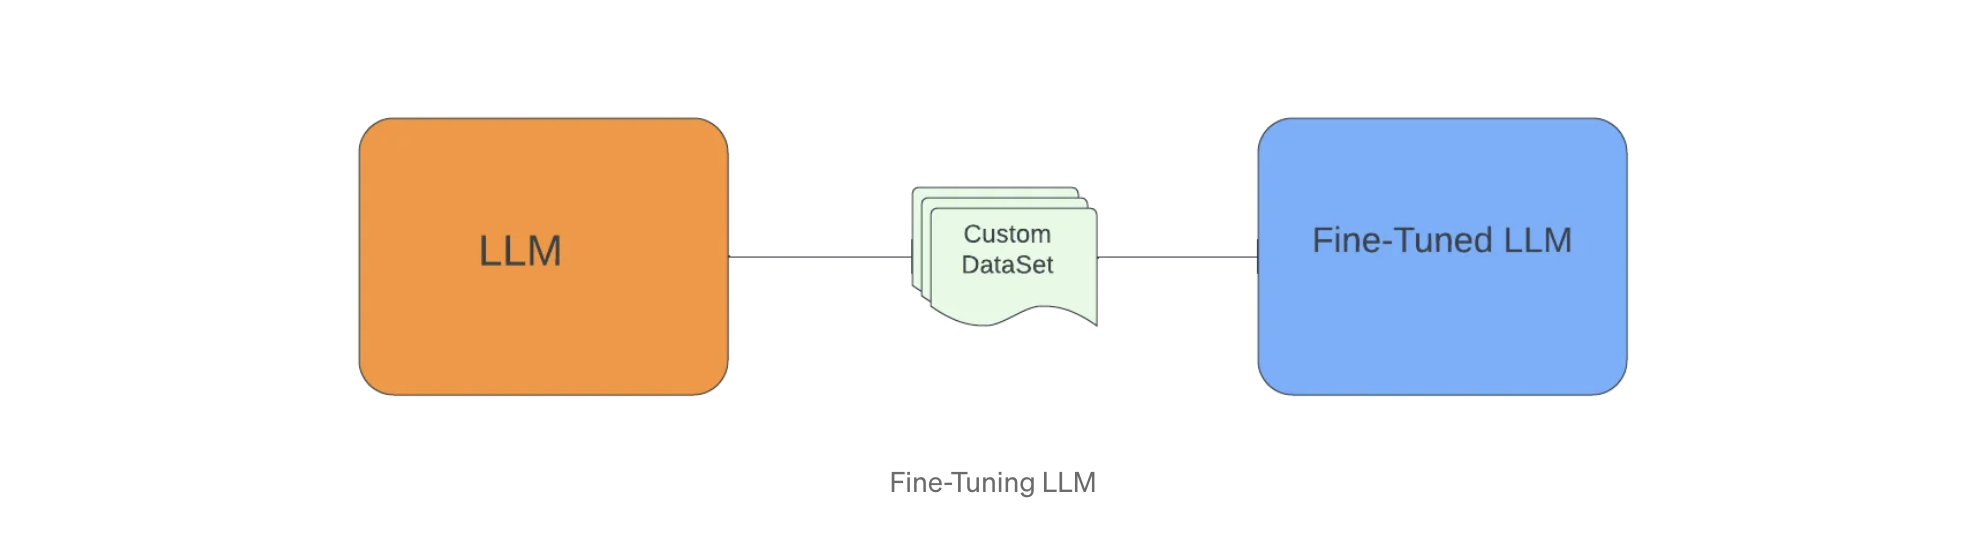
                                                                                                            

## **What is LLM Fine-Tuning?**

### **1. Introduction to Large Language Models (LLMs)**

Large Language Models (LLMs) are a class of deep learning models designed to understand and generate human language. Examples include **GPT**, **BERT**, **T5**, and **LLaMA**. These models are pre-trained on massive text corpora (such as Common Crawl, Wikipedia, and books) using self-supervised learning objectives like **masked language modeling** or **next-token prediction**. This enables them to capture the statistical and semantic properties of language.

However, pre-trained LLMs are **general-purpose** and may not always perform optimally on **task-specific** or **domain-specific** problems. This is where **fine-tuning** comes into play.


### **2. What is Fine-Tuning?**

**Fine-tuning** is a **transfer learning** technique where a pre-trained model is further trained on a smaller, labeled dataset that is specific to a particular task or domain. This process allows the model to retain its general understanding of language while adapting to new linguistic patterns, terminologies, and task-specific goals.

> Fine-tuning can be thought of as **"specializing"** a generalist model for a specific use case.

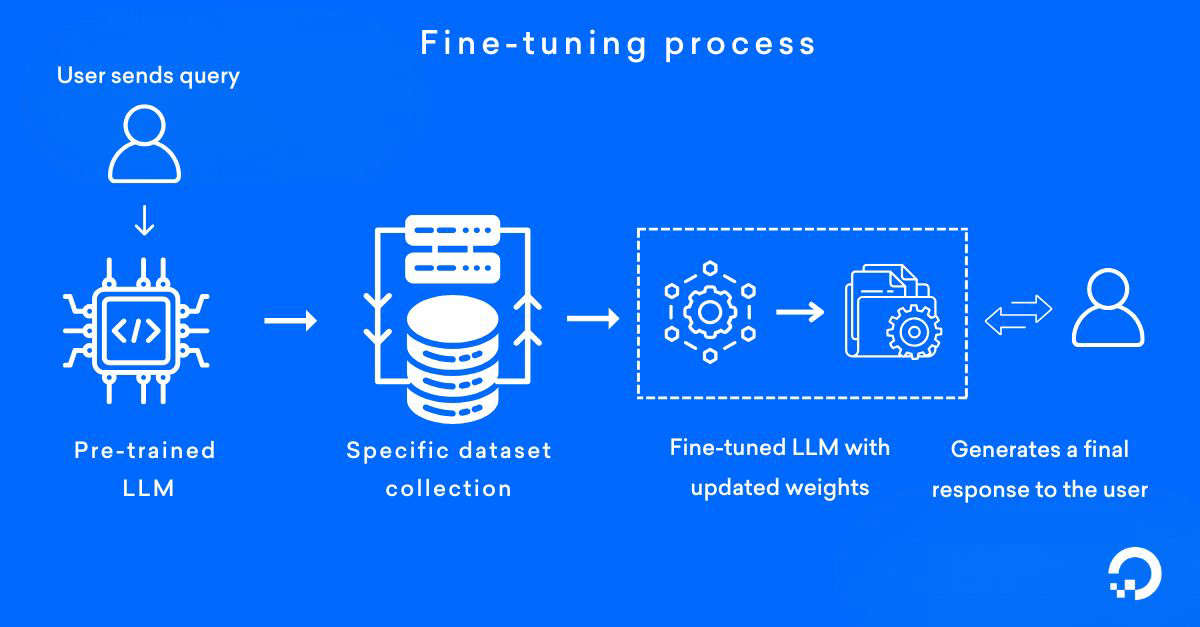

### **3. Fine-Tuning Process**

Fine-tuning a large language model involves adapting a pre-trained general-purpose model to a specific task or domain. This is typically achieved through a series of structured steps:


#### **a. Selecting a Pre-trained Model**

**Objective:**  
Choose a suitable base model that has already been trained on a large corpus of general text data.

**Details:**
- Popular pre-trained models include **GPT (OpenAI)**, **BERT (Google)**, **T5**, **RoBERTa**, and **LLaMA (Meta)**.
- The selection depends on the task type (e.g., classification, generation, summarization), the model's size, and computational resources.
- Consider open-source availability, licensing, and framework compatibility (e.g., PyTorch or TensorFlow).

**Example:**  
For document classification, BERT-based models are preferred. For text generation, GPT-type models are more suitable.


#### **b. Preparing a Task-Specific Dataset**

**Objective:**  
Create or collect a labeled dataset that reflects the specific task or domain the model is being fine-tuned for.

**Details:**
- The dataset should contain **examples relevant to the target use case**, ideally formatted as input-output pairs.
- Data preparation includes **cleaning**, **normalizing**, **tokenizing**, and **splitting** into training, validation, and test sets.
- High data quality is crucial, especially since fine-tuning uses smaller datasets than full pre-training.

**Example:**  
For a medical assistant, the dataset might include clinical questions and expert responses. For sentiment analysis, it could be reviews labeled as positive, neutral, or negative.

#### **c. Model Adaptation (Training)**

**Objective:**  
Further train the pre-trained LLM on the curated task-specific dataset to adapt its weights to the new context.

**Details:**
- Fine-tuning uses **backpropagation** and **gradient descent**, usually at a lower learning rate than pre-training.
- The scope of tuning depends on the method used: full, partial, adapters, LoRA, etc.
- Fine-tuning may be **supervised**, **semi-supervised**, or use **reinforcement learning** strategies.

**Training Considerations:**
- Tune parameters like **batch size**, **learning rate**, **epochs**, and optimizer choice.
- Use libraries like **Hugging Face Transformers**, which offer `Trainer` and `PEFT` utilities for ease of use.


#### **d. Evaluation and Optimization**

**Objective:**  
Assess the performance of the fine-tuned model and optimize it for better results.

**Details:**
- Evaluate on **validation and test sets** using metrics such as accuracy, F1 score, BLEU, ROUGE, or perplexity.
- Common optimization techniques:
  - **Early Stopping**: Halts training when validation performance stops improving.
  - **Hyperparameter Tuning**: Adjusts training configurations to improve outcomes.
  - **Regularization**: Applies techniques like dropout or weight decay to prevent overfitting.

**Example:**  
If a model excels on the training set but fails on validation data, it may be overfitting—indicating the need for better regularization or more diverse training data.


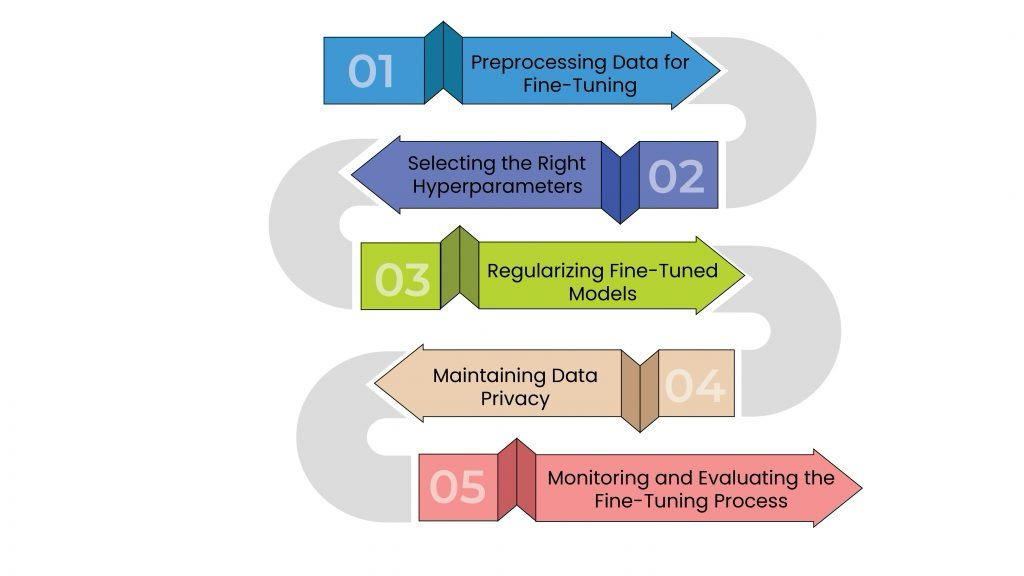


### **4. Types of Fine-Tuning Techniques**

Fine-tuning strategies for LLMs differ in how much of the model is updated and the resources required. Below are the main approaches:


#### **a. Full Fine-Tuning**

**Description:**  
All model layers are updated during training.

**Pros:**
- Best performance, especially with sufficient task-specific data.
- Deep adaptation to the new domain.

**Cons:**
- High computational and memory cost.
- Longer training time.
- Risk of overfitting with small datasets.


#### **b. Partial Fine-Tuning**

**Description:**  
Only a portion of the model's layers (typically the top layers) are updated; others are frozen.

**Pros:**
- Lower compute and memory usage.
- Faster training.

**Cons:**
- Less effective on highly specialized tasks.
- Limited domain adaptation.


#### **c. Adapter Layers**

**Description:**  
Small trainable networks (adapters) are inserted between layers. Only these are trained.

**Pros:**
- Efficient and modular.
- Preserves original model weights.
- Great for multi-task learning.

**Cons:**
- Slightly lower accuracy compared to full fine-tuning.
- Adds minimal inference latency.


#### **d. LoRA (Low-Rank Adaptation)**

**Description:**  
Low-rank matrices are used to inject trainable parameters into frozen layers.

**Pros:**
- Very efficient in terms of parameters and memory.
- Ideal for large-scale models and limited hardware.

**Cons:**
- Slightly more complex to implement.
- Needs tuning of rank size.


#### **e. Prompt-Tuning / Prefix-Tuning**

**Description:**  
Learnable prompts or tokens are added to the input to guide the model's behavior.

**Pros:**
- No need to change model weights.
- Extremely lightweight and reusable.
- Good for generation tasks.

**Cons:**
- May not perform well on complex or structured tasks.
- Careful design of prompt format is crucial.



### **5. Benefits of Fine-Tuning**

- **Higher Task Accuracy**: Fine-tuned models typically outperform generic LLMs on specialized tasks.
- **Domain Adaptation**: Adapts to specific jargon, writing styles, and contextual nuances.
- **Reduced Labeling Effort**: Requires significantly fewer labeled examples compared to training from scratch.
- **Customization**: Models can be aligned with organizational tone, ethics, or objectives.

### **6. Challenges in Fine-Tuning**

- **Overfitting**: With limited data, the model may memorize rather than generalize.
- **Catastrophic Forgetting**: The model might lose its general knowledge during fine-tuning if not managed properly.
- **Compute Requirements**: Full fine-tuning of very large models can be resource-intensive.
- **Data Quality**: Fine-tuning on noisy or biased data can degrade performance or produce harmful outputs.



# **🛍️ Sentiment Analysis with the Amazon Polarity Dataset**

### **Dataset Introduction**

The **Amazon Polarity dataset** is a large-scale sentiment analysis dataset derived from Amazon product reviews. It is widely used for binary classification tasks in natural language processing (NLP), particularly to train and evaluate models on **opinion mining** and **text classification**.

### **Dataset Overview**

- **Source**: Amazon product reviews
- **Task**: Binary sentiment classification  
- **Classes**:
  - `0`: **Negative**
  - `1`: **Positive**
- **Features**:
  - `title`: Title of the review
  - `content` (renamed to `text`): Full body of the review
  - `label`: Sentiment label (0 or 1)

### **Dataset Size**

The full dataset contains:
- **Training Set**: 3.6 million examples
- **Test Set**: 400,000 examples

> ⚠️ **Note**: For the purpose of this project, we downsampled the dataset to 1,000 examples for training and 1,000 for testing to allow rapid prototyping and experimentation on limited hardware.

### **Why This Dataset?**

The Amazon Polarity dataset is ideal for:
- Practicing and benchmarking sentiment classification models
- Testing transfer learning with transformer-based models like BERT and DistilBERT
- Evaluating performance in real-world opinionated text scenarios

By fine-tuning a pre-trained model on this dataset, we aim to accurately predict whether a review expresses a **positive** or **negative** sentiment based solely on its text.


## **Step 1: Load the Dataset**


#### 📥 **Load the Amazon Polarity Dataset**


We start by loading the **Amazon Polarity dataset** from Hugging Face Datasets.

This dataset contains millions of Amazon reviews, categorized into:
- `label = 0`: Negative sentiment
- `label = 1`: Positive sentiment

Each review includes:
- `title`: The title of the review
- `content`: The main body of the review (we rename this to `text`)

Since training on the full dataset is time-consuming, we:
- Randomly shuffle the dataset using a fixed `seed` for reproducibility
- Select a **subset of 1,000 samples** each for training and testing

This enables faster experimentation while preserving class balance.


In [2]:
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer
)
from peft import get_peft_model, LoraConfig
import evaluate
import torch
import numpy as np

In [10]:
dataset = load_dataset("amazon_polarity")


In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 3600000
    })
    test: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 400000
    })
})

In [14]:
# === LOAD NEW DATASET ===
dataset = load_dataset("amazon_polarity")
dataset = dataset.rename_column("content", "text")  # So it matches your tokenize_function
dataset["train"] = dataset["train"].shuffle(seed=42).select(range(1000))
dataset["test"] = dataset["test"].shuffle(seed=42).select(range(1000))

In [16]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'text'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['label', 'title', 'text'],
        num_rows: 1000
    })
})

## 🧹**Step 2: Dataset Exploration & Preprocessing**

#### 🔍 Exploratory Data Analysis (EDA)

We perform some basic analysis:
- **Class distribution**: To check if our dataset is balanced.
- **Text length distribution**: To understand how long the reviews are, helping decide on truncation length for tokenization.

This analysis guides preprocessing decisions such as padding, truncation, and tokenizer settings.


In [8]:
from pandas import DataFrame

DataFrame(dataset["train"][5:11])  


,label,title,text
0,1,Not a bad deal...,"If you're considering purchasing this movie, I..."
1,1,Nice extras on the 300 DVD,"Good picture on blu-ray, but I don't know if i..."
2,0,Too Mellow for Me,I've always been a John Mellencamp fan (all th...
3,1,just what I needed,I need t's like this to get through my days at...
4,1,nasty,"In 1880s Australia, a lawman makes a deal with..."
5,1,"Yeah it's pricey, but it's pretty funny...","OK, if you aren't a die-hard Family Guy fan, i..."


/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/3015288509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=[label_counts[0], label_counts[1]], palette="Set2")


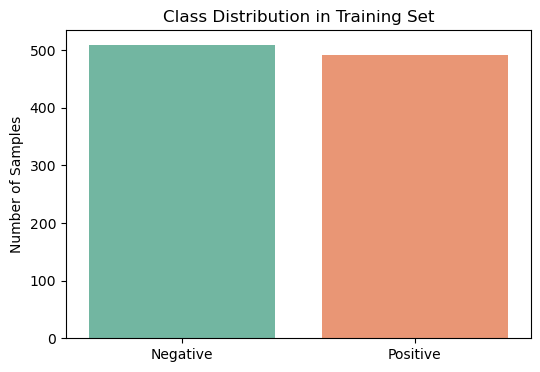

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count labels
label_counts = Counter(dataset["train"]["label"])
label_names = ["Negative", "Positive"]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_names, y=[label_counts[0], label_counts[1]], palette="Set2")
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Samples")
plt.show()


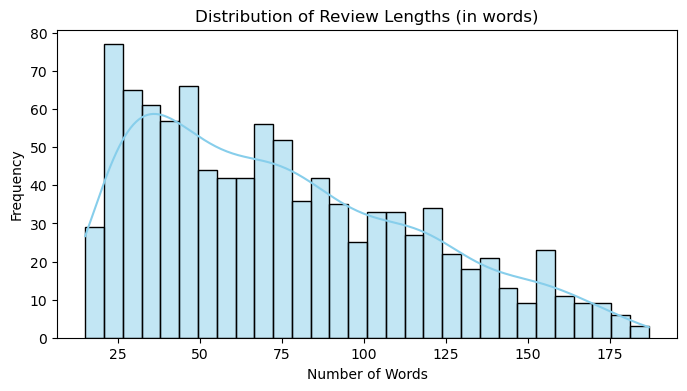

In [20]:
# Calculate lengths of review texts
train_lengths = [len(text.split()) for text in dataset["train"]["text"]]
# Plot
plt.figure(figsize=(8, 4))
sns.histplot(train_lengths, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Review Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Distribution of Review Lengths (in Words)

This histogram shows the distribution of word counts across the reviews in the training dataset. Most reviews contain between **25 to 100 words**, with the peak around **30–40 words**. The curve (KDE) indicates a right-skewed distribution, meaning there are a few very long reviews but most are relatively short. This analysis helps in setting a suitable `max_length` for tokenization (e.g., 128 or 256), ensuring we capture enough content without excessive padding or truncation.


## **Step 3: Model & Tokenizer Setup**


#### **Load Pre-trained Model & Tokenizer**

In this step, we initialize both the **DistilBERT model** and its corresponding **tokenizer**, preparing them for fine-tuning on our custom sentiment classification task.

### **1. Model Chosen: DistilBERT**

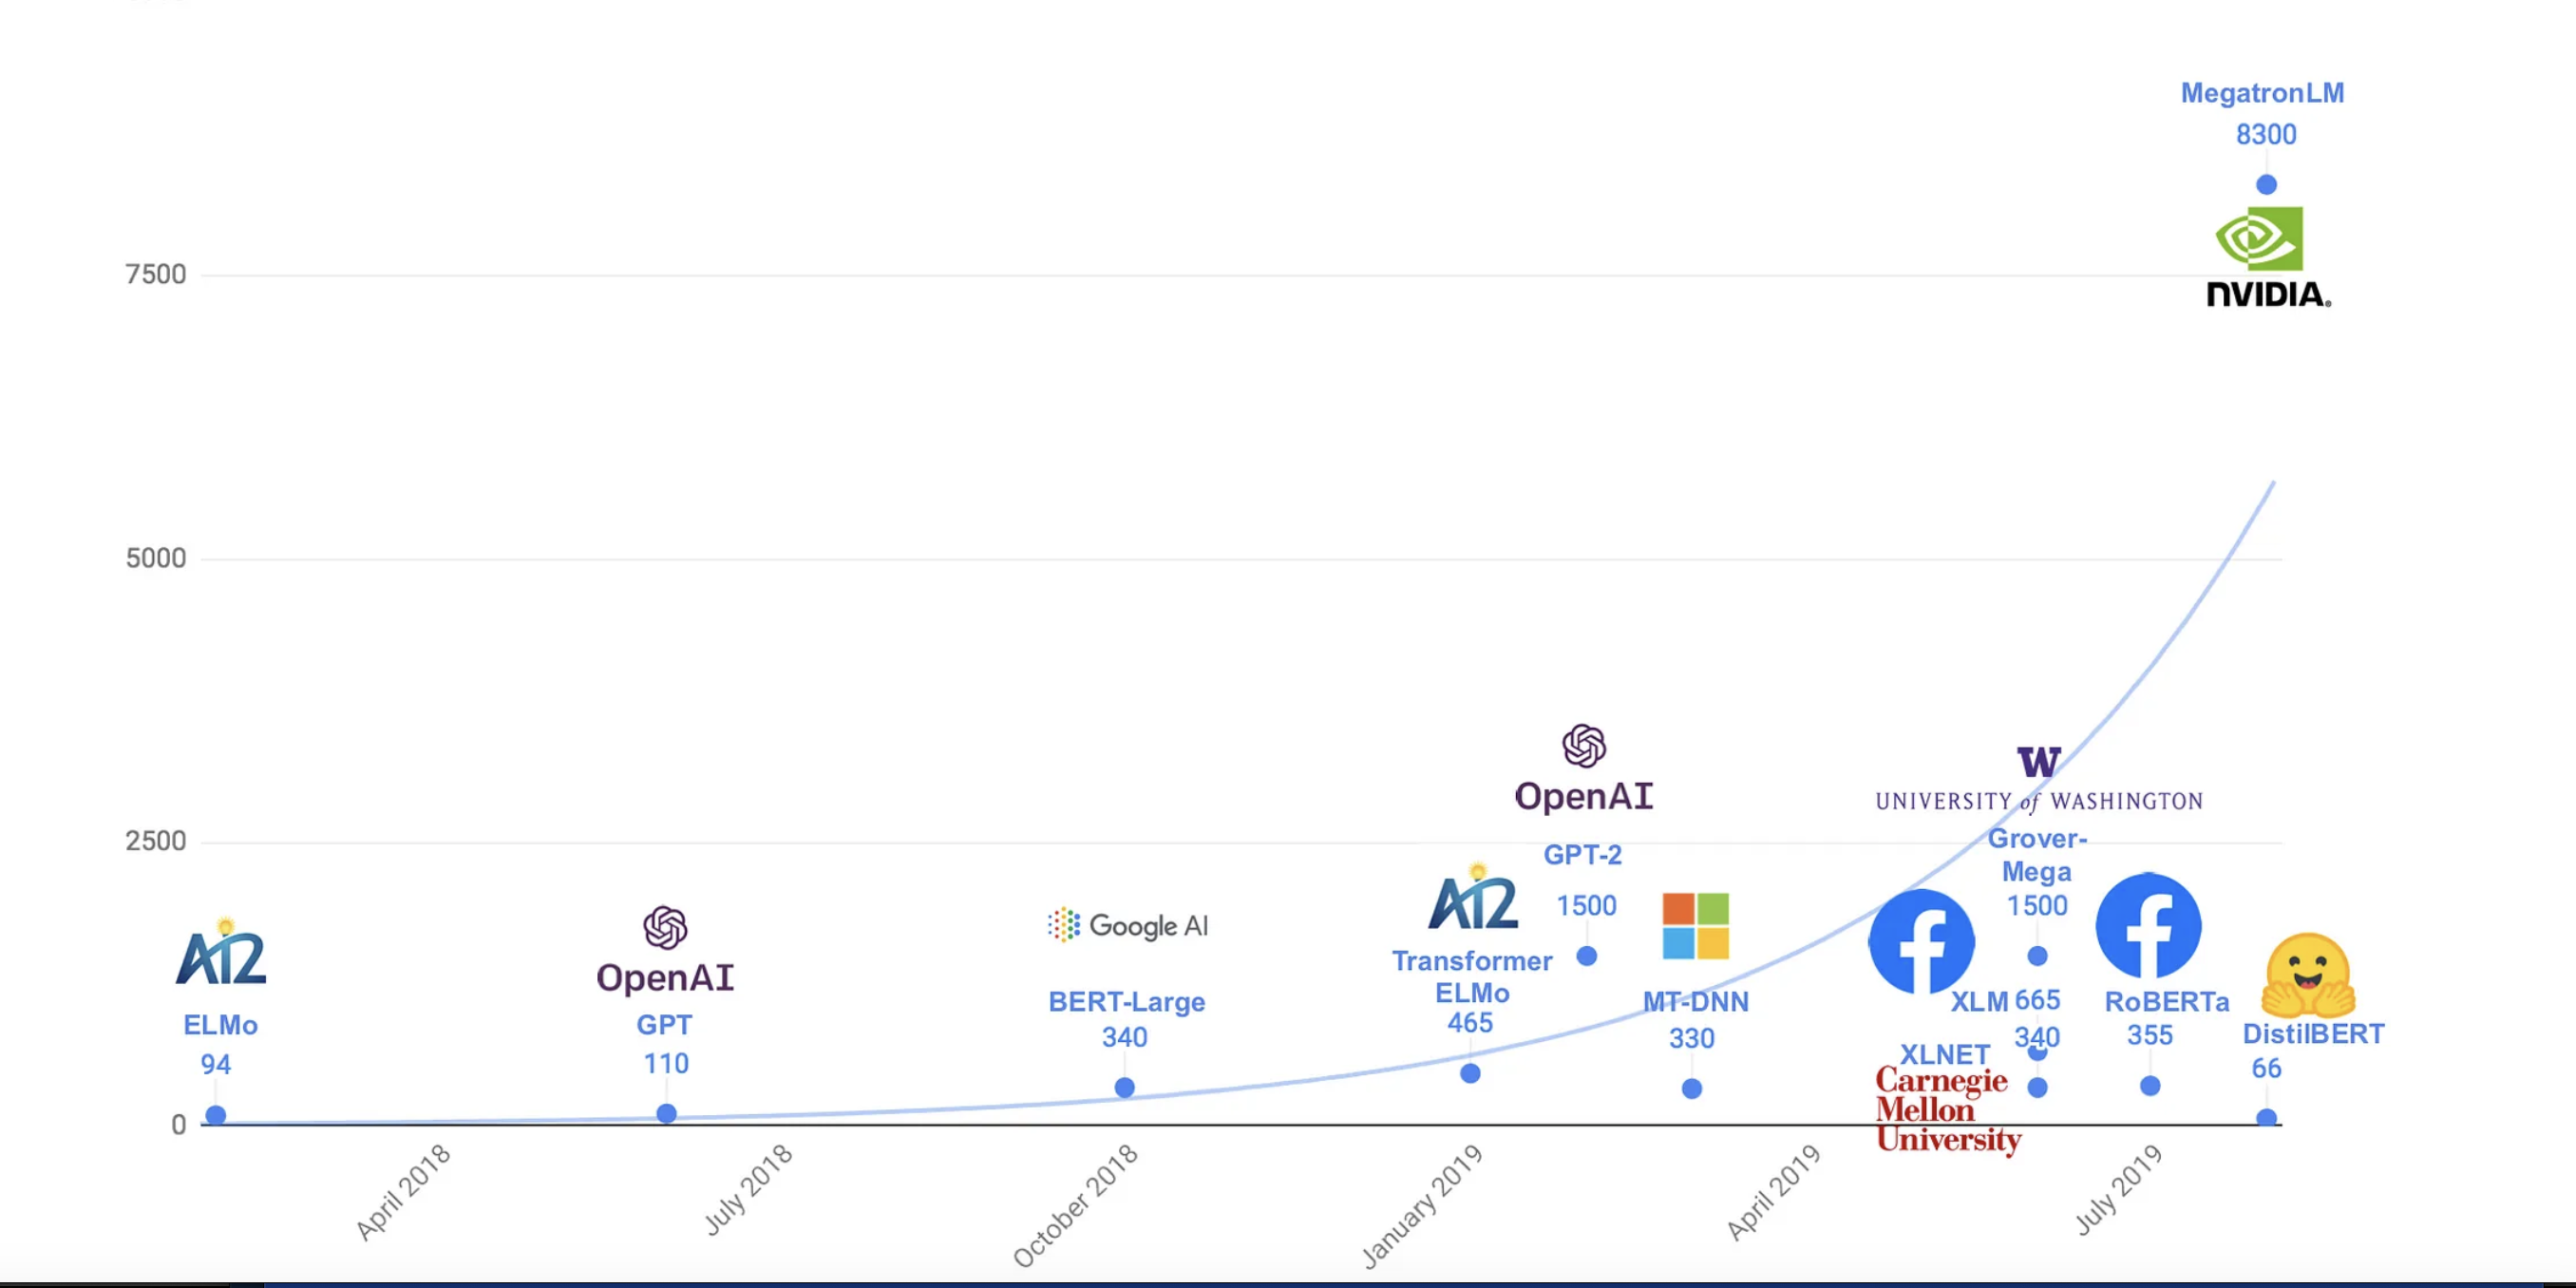


### **Background: From BERT to DistilBERT**

#### **BERT: The Foundation**

BERT (Bidirectional Encoder Representations from Transformers), introduced by Google in 2018, was revolutionary in NLP. It used a **Transformer encoder** to learn deep bidirectional representations by jointly conditioning on both left and right context in all layers.

Key innovations:
- **Masked Language Modeling (MLM)**: Predicting missing tokens in a sentence.
- **Next Sentence Prediction (NSP)**: Learning inter-sentence relationships.

BERT set new records across a wide range of NLP benchmarks — from sentiment classification to question answering.

However, BERT had two major limitations:
- **Size**: 110M parameters for base; 340M+ for large.
- **Inference Time**: Too slow for real-time or edge applications.

#### **Enter DistilBERT**

To address BERT’s inefficiencies, Hugging Face released **DistilBERT** in 2019. It uses **knowledge distillation** to compress BERT into a smaller, faster model without significantly compromising accuracy.

Key paper: *DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter* ([Sanh et al., 2019](https://arxiv.org/abs/1910.01108))

### **What is Knowledge Distillation?**

Knowledge distillation is a **model compression technique** where a small model (called the *student*) learns to mimic a large, high-performing model (the *teacher*).

Rather than training the student from scratch, it is trained to reproduce the **soft targets** (logits/probabilities) output by the teacher.


### **DistilBERT Architecture**

DistilBERT is essentially a **compressed version of BERT-base**, with several smart modifications:

| Component | BERT-base | DistilBERT |
|----------|-----------|------------|
| Layers | 12 | 6 |
| Hidden size | 768 | 768 |
| Attention heads | 12 | 12 |
| Parameters | 110M | ~66M |
| Token-type embeddings | Yes | ❌ No |
| Pooling layer | Yes | ❌ No |
| Training objective | MLM + NSP | Only MLM |

#### **Differences from BERT:**

- **50% fewer layers** → DistilBERT uses every other layer of BERT as initialization.
- **Removed NSP objective** → NSP was shown to have minimal effect on downstream tasks.
- **Removed token-type embeddings** → Simpler design, helps reduce parameters.
- **Same hidden size & vocabulary** → Ensures compatibility with pretrained BERT tokenizer and embeddings.


### **DistilBERT Components**

1. **Embeddings**:
   - Word embeddings
   - Positional embeddings (max length = 512)
   - No segment embeddings

2. **Encoder Layers (×6)**:
   Each layer contains:
   - Multi-head self-attention
   - Layer normalization
   - Feedforward network:
   - Dropout

3. **Classification Head** (for tasks like sentiment analysis):
   - `pre_classifier`: Linear → Activation
   - `classifier`: Final Linear layer (e.g., 2 outputs for binary classification)


### **Performance Gains**

Compared to BERT-base, DistilBERT offers:

- 🔢 ~40% fewer parameters (66M vs. 110M)
- ⚡ ~60% faster inference
- 📈 ~97% of downstream task performance

It’s the **perfect balance** between performance and efficiency — especially when:
- You have limited compute
- You need quick training cycles
- You're prototyping or deploying in low-resource environments


### **Why DistilBERT is Ideal for This Task**

You're working on **binary sentiment classification** using the **Amazon Polarity dataset**, with **only 1000 training samples**.

DistilBERT fits this use case perfectly because:
- It’s **pre-trained**, giving it general language understanding
- It’s **lightweight**, so fine-tuning is fast
- It performs **strongly** even with small datasets
- It integrates smoothly with tools like **LoRA** and **PEFT** for parameter-efficient fine-tuning

In short: DistilBERT gives you great results, fast training, and minimal compute overhead — all of which are crucial for academic projects or production prototypes.


#### **What is a Tokenizer?**

A tokenizer is a crucial component in any NLP pipeline. It:
- Splits raw text into tokens (subword units)
- Converts tokens into **input IDs** (integers) using a vocabulary
- Adds special tokens like `[CLS]`, `[SEP]`, and padding if necessary
- Creates an **attention mask**, which tells the model which tokens are real input vs. padding

The tokenizer must match the pre-trained model architecture to ensure correct encoding of the input text.



In [22]:
# === TOKENIZER ===
model_checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)


In [26]:
from transformers import AutoModelForSequenceClassification

# Make sure this matches the tokenizer checkpoint
model_checkpoint = "distilbert-base-uncased"

# Define label mappings
id2label = {0: "Negative", 1: "Positive"}
label2id = {"Negative": 0, "Positive": 1}

# Load base model for classification
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



This is **expected** behavior.

#### **Why?**
The base `distilbert` layers are pre-trained on a large corpus. However:
- The final **classification layers** (`classifier` and `pre_classifier`) are **newly added** to adapt the model to our specific task (sentiment classification).
- These layers are **randomly initialized** and require **fine-tuning** to learn meaningful patterns.

### **Summary**
This model structure combines the strength of a **pre-trained transformer encoder** (DistilBERT) with a **custom classification head**, enabling us to efficiently fine-tune it for our sentiment analysis task.


In [28]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


## **✂️ Tokenization**

Before we can feed text into the model, we must convert it into numerical format.

We define a `tokenize_function()` that:
- Uses the pre-initialized tokenizer
- Truncates long reviews to a max of 512 tokens (BERT limit)
- Returns both `input_ids` and `attention_mask`

Then, we apply this tokenizer function using `dataset.map()` with `batched=True` to process the entire dataset efficiently.

This results in a new dataset with extra columns:
- `input_ids`: Tokenized integer IDs for each word
- `attention_mask`: Binary mask (1 for actual token, 0 for padding)


In [30]:
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

In [32]:
# === TOKENIZE FUNCTION ===
def tokenize_function(examples):
    tokenizer.truncation_side = "left"
    return tokenizer(examples["text"], return_tensors="np", truncation=True, max_length=512)


In [34]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['label', 'title', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

## **🧰 Step 5: Data Collator**

####  Data Collator for Padding

We use `DataCollatorWithPadding` from Hugging Face.

This ensures:
- Dynamic padding to the longest sequence in each batch
- No need to pad all sequences manually to a fixed length

Why it matters:
- Avoids unnecessary computation on padding tokens
- Improves training efficiency




In [36]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [38]:
accuracy = evaluate.load("accuracy")


#### 📏 Evaluation Metric: Accuracy

We define a function `compute_metrics()` to calculate **accuracy** during evaluation.

How it works:
- The model outputs raw logits (unnormalized scores)
- We apply `argmax()` to get predicted labels
- We compare predictions to true labels using the `evaluate` library

This function is passed to the `Trainer` so that evaluation results are reported automatically after each epoch.


In [40]:
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

## **🧪 Step 6: Test Predictions (Before Fine-Tuning)**

**Untrained Model Predictions**

Before fine-tuning the model, we test a few predictions using raw text inputs.

Why?
- This acts as a **baseline** showing the model's performance before learning
- As expected, predictions are mostly incorrect or random, since the classification head is not trained yet

This step reinforces the need for fine-tuning on task-specific data.


In [42]:
# Define example inputs
text_list = [
    "It was good.",
    "Not a fan, don't recommend.",
    "Better than the first one.",
    "This is not worth watching even once.",
    "This one is a pass."
]

print("Untrained model predictions:")
print("----------------------------")
for text in text_list:
    inputs = tokenizer.encode(text, return_tensors="pt")
    logits = model(inputs).logits
    predictions = torch.argmax(logits)
    print(text + " - " + id2label[predictions.tolist()])

Untrained model predictions:
----------------------------
It was good. - Negative
Not a fan, don't recommend. - Positive
Better than the first one. - Negative
This is not worth watching even once. - Negative
This one is a pass. - Negative


## **🧩 Step 7: Add LoRA (Low-Rank Adaptation)**

LoRA (Low-Rank Adaptation) is a method for fine-tuning large models efficiently by:
- **Freezing** most of the pre-trained weights
- **Inserting small trainable adapters** into key layers (like attention projections)

We use the `peft` library to configure LoRA:
- `r`: Rank of the adapter matrix
- `alpha`: Scaling factor
- `target_modules`: Layers to apply LoRA (e.g., `q_lin`)
- `dropout`: Regularization during training

This drastically reduces the number of trainable parameters — we train <1% of the model while maintaining performance.



### **LoRA: Low-Rank Adaptation for Efficient Fine-Tuning**


#### **What is LoRA?**
In very simple words, LoRA leverages the concept of lower-rank matrices to make the model training process extremely efficient and fast.

Large models have a lot of parameters. For example, GPT-3 has 175 billion parameters. These parameters are just numbers stored in matrices. Storing them requires a lot of storage.

Full fine-tuning means all the parameters will be trained, and this will require an extraordinary amount of compute resources that can easily cost in the millions of dollars for a model size like GPT.

Unlike traditional fine-tuning that requires adjusting the entire model, LoRA focuses on modifying a smaller subset of parameters (lower-rank matrices), thereby reducing computational and memory overhead.

LoRA is built on the understanding that large models inherently possess a low-dimensional structure. By leveraging low-rank matrices, LoRA adapts these models effectively. This method focuses on the core concept that significant model changes can be represented with fewer parameters, thus making the adaptation process more efficient.

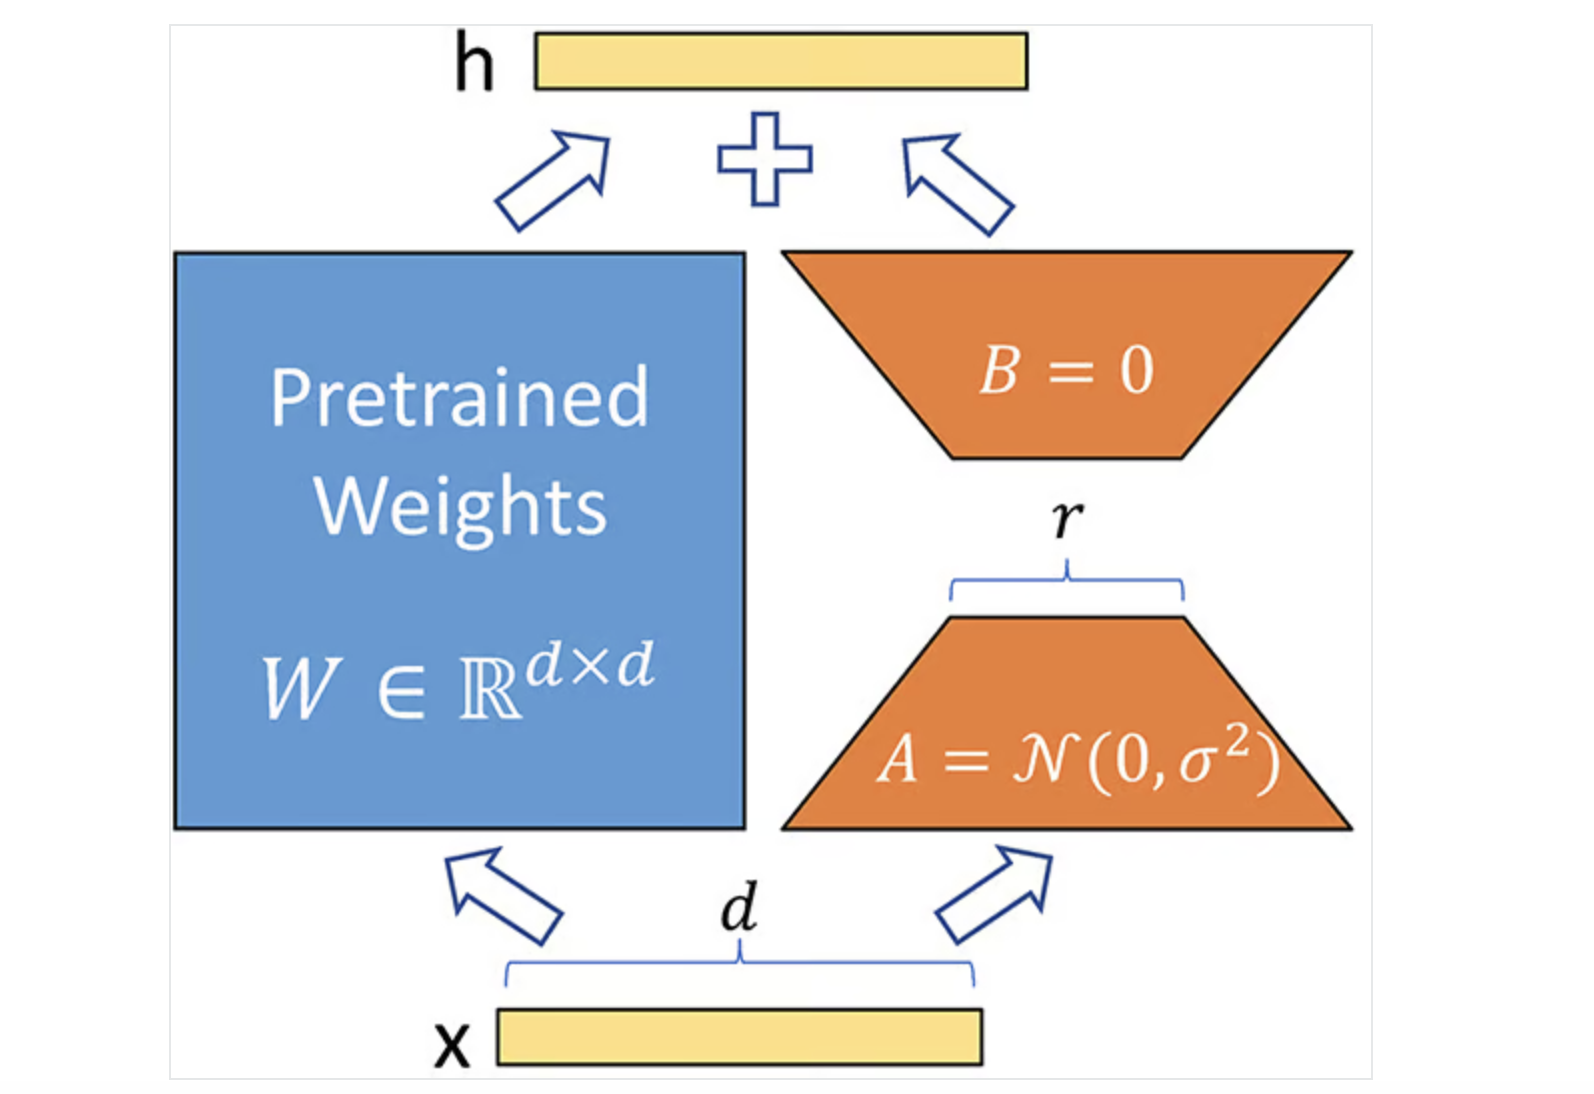

#### **So how does it work?**
First, we decompose the large weight matrices into smaller matrices using the lower-rank matrix technique, as explained above. This drastically reduces the number of trainable parameters. For a model like GPT-3, trainable parameters are reduced by 10000 times. This means instead of training 175 billion parameters, if you apply LoRA, you only have 17.5 million trainable parameters.

We do not change any parameters for a pre-trained model. Instead, only train lower-rank matrices, which happen relatively very quickly because of fewer parameters.

The weights are additive. This means for inference, we just add the weights of lower-rank matrices to pre-trained weights without any additional latency. The lower-rank matrices are very small in size as well so it is very easy to load and unload them for different tasks and different users.


#### **Motivation: Why Do We Need LoRA?**

Large Language Models (LLMs) like BERT, GPT, and T5 have **hundreds of millions to billions of parameters**. Fine-tuning such models fully can be:

- 🧠 Memory intensive  
- 💸 Expensive (compute + storage)  
- 🐢 Slow to train  
- ❌ Not scalable if you want to fine-tune for many tasks or users  

**LoRA** (Low-Rank Adaptation) was introduced to solve this problem.

Instead of updating all the weights of a pre-trained model, LoRA **freezes the model weights** and injects **small trainable matrices** into the network.

It’s a smart, lightweight way to adapt large models to new tasks without retraining everything.

#### **Paper: LoRA Origins**

- Title: **LoRA: Low-Rank Adaptation of Large Language Models**
- Authors: Edward J. Hu et al. (Microsoft Research)
- Published: 2021
- Link: https://arxiv.org/abs/2106.09685

#### **Where is LoRA Applied?**

In transformer-based models, LoRA is typically applied to **linear layers inside attention modules**, such as:

- `q_proj` (query projection)
- `v_proj` (value projection)
- `k_proj` (key projection)
- Optionally, MLP layers

You can specify which layers to target with LoRA using the `target_modules` parameter (e.g., `["q_lin"]` in DistilBERT).

#### ✅ Benefits of LoRA

| Benefit | Description |
|--------|-------------|
| 💡 Efficient | Trains <1% of parameters |
| 🚀 Fast | Speeds up training |
| 🧠 Scalable | Easy to train task-specific adapters |
| 🔄 Reversible | Doesn't modify original weights |
| 🧱 Modular | You can swap in different LoRA adapters for different tasks |

#### ❗ When to Use LoRA?

- When you have **limited compute** (e.g., CPU, single GPU)
- When you want to fine-tune **multiple tasks or clients** (e.g., federated learning)
- When you're prototyping quickly and need **low-overhead experimentation**
- When you want to preserve **base model behavior**

#### **LoRA + PEFT = 🔥**

LoRA becomes even easier to use with Hugging Face's `peft` library, which lets you inject LoRA into models with **just a few lines of code**.

#### **Summary**

LoRA is one of the most impactful techniques in modern NLP for **parameter-efficient fine-tuning**.

It combines:
- **Mathematical simplicity** (low-rank matrix updates)
- **Practical scalability** (fine-tune big models with low cost)
- **Modular design** (swap adapters as needed)

It’s ideal for research, production, and resource-constrained environments alike.

In [44]:
peft_config = LoraConfig(task_type="SEQ_CLS",
                        r=4,
                        lora_alpha=32,
                        lora_dropout=0.01,
                        target_modules = ['q_lin'])

In [46]:
peft_config

LoraConfig(task_type='SEQ_CLS', peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, inference_mode=False, r=4, target_modules={'q_lin'}, exclude_modules=None, lora_alpha=32, lora_dropout=0.01, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_token_indices=None, loftq_config={}, eva_config=None, corda_config=None, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False), lora_bias=False)

## **PEFT: Parameter-Efficient Fine-Tuning with Hugging Face**

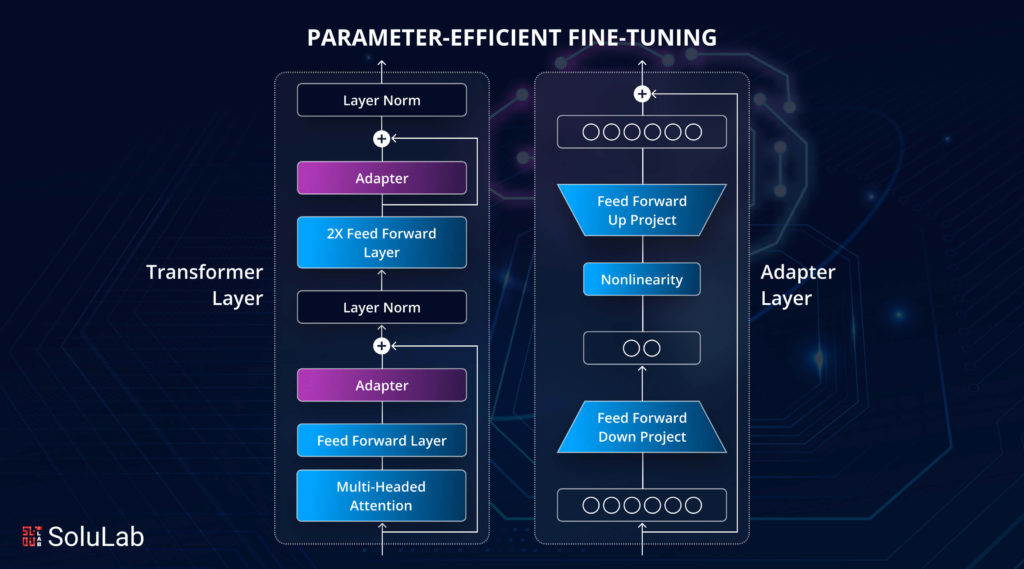

**PEFT (Parameter-Efficient Fine-Tuning)** is a high-level library built by Hugging Face to make techniques like LoRA, Adapters, Prefix Tuning, and Prompt Tuning easy to implement in practice. The core idea behind PEFT is to allow developers and researchers to **adapt large language models to new tasks** without having to retrain or fine-tune all of the model's weights. Instead, PEFT introduces small, trainable modules into specific layers (e.g., attention projections), keeping the base model frozen. This reduces GPU memory consumption, cuts training time, and allows multiple task-specific adapters to be trained and swapped modularly — all while maintaining much of the model’s predictive power.

What makes PEFT powerful is its **modularity and integration with Hugging Face Transformers**. With only a few lines of code, users can define a configuration (e.g., LoRA settings), wrap their pre-trained model using `get_peft_model`, and fine-tune just the injected parameters. This is especially beneficial when working with large models like BERT, GPT, or LLaMA on limited hardware. PEFT also supports saving and loading LoRA adapters separately from the base model, making it easy to deploy or share customized models. Overall, PEFT provides a **scalable, production-ready way** to implement efficient fine-tuning across multiple downstream tasks, making large-scale NLP more accessible and flexible.




In [48]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 628,994 || all params: 67,584,004 || trainable%: 0.9307


In [50]:
import transformers
print(transformers.__version__)


4.51.3


##  **🏋️ Step 8: Hyperparameter Optimization**



#### **⚙️ Hyperparameters: What & Why**

We performed **manual hyperparameter tuning** by testing different combinations of:

| Hyperparameter     | Values Tested                 | Why We Chose It                         |
|--------------------|-------------------------------|------------------------------------------|
| **Learning Rate**  | `1e-3`, `5e-4`, `3e-4`         | Controls how quickly the model learns. We tried a range from aggressive (`1e-3`) to conservative (`3e-4`) to balance convergence speed and stability. |
| **Batch Size**     | `4`, `8`, `16`                | Affects memory usage and model generalization. Smaller sizes like `4` can lead to noisy updates; larger sizes like `16` stabilize training. |
| **Epochs**         | `5`                           | Based on visual inspection of training loss; sufficient for convergence on our small dataset. |
| **LoRA Settings**  | `r=4`, `lora_alpha=32`, `dropout=0.01` | These settings reduce training cost while preserving performance. Lower `r` reduces parameters; higher `alpha` stabilizes learning. |

Each config was evaluated using accuracy on the test set, and the best-performing one was selected.

This acts as a mini **grid search** for hyperparameters.



In [60]:
from transformers import TrainingArguments, Trainer
from peft import get_peft_model
import numpy as np

# Store results
results = []

# Define different configurations
hyperparam_configs = [
    {"lr": 1e-3, "batch_size": 4, "label": "lr=1e-3, bs=4"},
    {"lr": 5e-4, "batch_size": 8, "label": "lr=5e-4, bs=8"},
    {"lr": 3e-4, "batch_size": 16, "label": "lr=3e-4, bs=16"},
]

for config in hyperparam_configs:
    print(f"\n🔧 Training with config: {config['label']}")

    # Training args
    training_args = TrainingArguments(
        output_dir=f"./results_{config['label'].replace(' ', '_')}",
        per_device_train_batch_size=config["batch_size"],
        per_device_eval_batch_size=config["batch_size"],
        learning_rate=config["lr"],
        num_train_epochs=5,
        logging_steps=50,
#        evaluation_strategy="epoch",
        save_strategy="no",
        report_to="none"
    )

    # Reload base model each time
    base_model = AutoModelForSequenceClassification.from_pretrained(
        model_checkpoint, num_labels=2, id2label=id2label, label2id=label2id
    )
    model = get_peft_model(base_model, peft_config)

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics
    )

    # Train and evaluate
    trainer.train()
    eval_result = trainer.evaluate()
    acc = eval_result["eval_accuracy"]["accuracy"]
    results.append((config["label"], acc))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔧 Training with config: lr=1e-3, bs=4


/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/2706038107.py:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
50,0.520400
100,0.640300
150,0.266700
200,0.592700
250,0.478600
300,0.267900
350,0.203600
400,0.408700
450,0.233100
500,0.355800


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/2706038107.py:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.



🔧 Training with config: lr=5e-4, bs=8


Step,Training Loss
50,0.514200
100,0.406200
150,0.348500
200,0.281000
250,0.212800
300,0.207600
350,0.178900
400,0.157000
450,0.134100
500,0.150400


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔧 Training with config: lr=3e-4, bs=16


/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/2706038107.py:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
50,0.532400
100,0.318900
150,0.251000
200,0.236100
250,0.211800
300,0.184300


In [62]:
eval_result = trainer.evaluate()
acc = eval_result["eval_accuracy"]["accuracy"]
results.append((config["label"], acc))


In [64]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 0.2959630787372589, 'eval_accuracy': {'accuracy': 0.902}, 'eval_runtime': 11.3202, 'eval_samples_per_second': 88.338, 'eval_steps_per_second': 5.565, 'epoch': 5.0}


## **📊 Step 10: Visualize Performance**


We plot the test accuracy of each hyperparameter configuration using a bar chart.

This helps us:
- Compare configurations visually
- Select the most effective learning rate and batch size

This step is key to **model tuning** and understanding trade-offs between speed and accuracy.

/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/667114383.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=scores, palette="mako")
/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/667114383.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


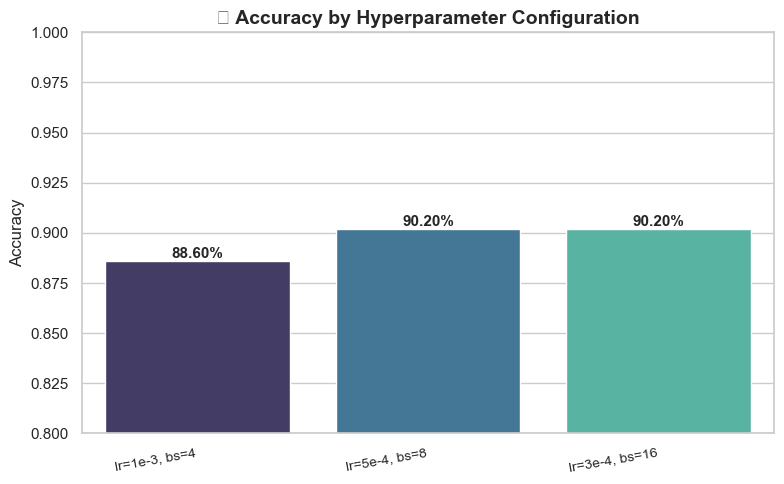

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [label for label, _ in results]
scores = [score for _, score in results]

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
bars = sns.barplot(x=labels, y=scores, palette="mako")

for bar in bars.patches:
    acc = bar.get_height()
    bars.annotate(f"{acc:.2%}",
                  (bar.get_x() + bar.get_width() / 2, acc),
                  ha='center', va='bottom', fontsize=11, weight='bold')

plt.title("📊 Accuracy by Hyperparameter Configuration", fontsize=14, weight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=10, ha="right", fontsize=10)
plt.ylim(0.80, 1.0)
plt.tight_layout()
plt.show()


This bar chart compares model performance across three different combinations of learning rates and batch sizes:

- **lr=1e-3, batch size=4** → Accuracy: **88.60%**
- **lr=5e-4, batch size=8** → Accuracy: **90.20%**
- **lr=3e-4, batch size=16** → Accuracy: **90.20%**

#### Observations

- The highest accuracy (**90.2%**) was achieved using both:
  - A moderate learning rate (`5e-4`)
  - Larger batch sizes (`8` and `16`)
- The configuration with a higher learning rate (`1e-3`) and smaller batch size (`4`) performed slightly worse, possibly due to unstable updates or overfitting.

#### Conclusion

This simple hyperparameter sweep highlights the importance of tuning. A **balanced learning rate and batch size** leads to more stable training and better generalization on the test set.

Although both `bs=8` and `bs=16` achieved similar accuracy, `bs=16` is more computationally efficient (fewer update steps per epoch), making it a good default choice moving forward.

In [70]:
preds = trainer.predict(tokenized_dataset["test"])
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

## **🕵️ Step 11: Error Analysis**


In [72]:
# Show some misclassified examples
from sklearn.metrics import confusion_matrix

misclassified_indices = np.where(y_pred != y_true)[0]
print(f"\n🔍 Total misclassified examples: {len(misclassified_indices)}\n")

for i in misclassified_indices[:10]:  # show top 10 only
    true_label = y_true[i]
    pred_label = y_pred[i]
    text = tokenized_dataset["test"][int(i)]["text"]

    print(f"📝 Text: {text}")
    print(f"✅ True Label: {'Positive' if true_label else 'Negative'}")
    print(f"❌ Predicted: {'Positive' if pred_label else 'Negative'}")
    print("-" * 60)



🔍 Total misclassified examples: 98

📝 Text: 1.Music-I don't like it,but too overplayed for this CD-2/5 stars2.Most Girls-I listen a lot when gets boring-4/5 stars3.Bent-Good rock tune-5/5 stars4.Everything You Want-I like Vertical Horizon,this song is bad-1/5 stars5.Deep Inside Of You-Good punk tune-5/5 stars6.Pinch Me-Great pop tune-5/5 stars7.The Way You Love Me-An ultimate love song,but little annoying-3.5/5 stars8.Here With Me-One of my favorites-5/5 stars9.He Wasn't Man Enough For Me-Good song,but too overplayed-4/5 stars10.What A Girl Wants-Annoying,depressing song-1/5 stars11.Wifey-Not my type of song-2/5 stars12.Dance with Me-My 2nd favorite song-5/5 stars13.Tell Me How You Feel-Not my type of song,again-2/5 stars14.Graduation-Best song on CD!!!!!-6/5 stars15.Breathless-An OK song-3/5 stars16.Fine-OK,I hate Whitney Houston-2/5 stars17.The Little Girl-Good country tune-5/5 stars
✅ True Label: Positive
❌ Predicted: Negative
-------------------------------------------------------

### 🕵️ Error Analysis: Misclassified Examples

From these, we displayed the **top 10 misclassified reviews**, along with:
- 📝 The actual review text  
- ✅ The true label (ground truth)  
- ❌ The predicted label (model output)  

### 📉 Findings

- **Total misclassified examples**: 98 out of 1000 → **9.8% error rate**

Several misclassifications were due to:

- **Mixed sentiments**: Reviews containing both strong positive and negative phrases  
  _Example: “I don’t like it... but gave it 5 stars”_

- **Subtle tone or sarcasm**: The model may miss implicit cues like irony or passive critique

- **Ambiguous structure**: Reviews summarizing **multiple products or experiences**, making classification unclear

- **Domain-specific vocabulary**: Technical or niche product terms not well understood by the base model

### 📌 Why It Matters

Error analysis helps:

- 🔍 **Reveal systematic weaknesses** in the model (e.g., overly positive or negative bias)
- 🛠️ **Inform future improvements**, like:
  - Adding more diverse training examples  
  - Augmenting the dataset with syntactic or semantic edge cases
- 🤝 **Increase trust** in model behavior by showing how and where it fails

This is a critical step in moving from model performance to **model understanding**.


## **Step 12: 📈 Evaluation Metrics & Confusion Matrix**

Once the model has been fine-tuned, it’s essential to evaluate its performance comprehensively. While accuracy gives us a high-level view, additional metrics and visual tools provide deeper insight into **how** and **where** the model is making mistakes.

---

#### **🧮 Evaluation Metrics**

We use the `classification_report` function from `sklearn.metrics` to compute the following:

#### 🔹 Accuracy
- Measures the proportion of correct predictions over total samples.
- Simple and intuitive, but **can be misleading if classes are imbalanced**.


#### 🔹 Precision
- Tells us how many of the predicted positive examples are actually correct.
- Important when **false positives** are costly (e.g., recommending a bad product).


#### 🔹 Recall
- Tells us how many of the actual positive examples were correctly identified.
- Important when **false negatives** are costly (e.g., missing harmful reviews).


#### 🔹 F1-Score
- Harmonic mean of precision and recall.
- Gives a single score that balances both concerns, especially useful for **imbalanced datasets**.

### 📊 Confusion Matrix

The confusion matrix is a 2x2 grid that summarizes predictions:
- **Rows** represent actual (true) classes
- **Columns** represent predicted classes

|                      | Predicted: Negative | Predicted: Positive |
|----------------------|---------------------|---------------------|
| **Actual: Negative** | True Negative (TN)  | False Positive (FP) |
| **Actual: Positive** | False Negative (FN) | True Positive (TP)  |

#### Why use it?

- Helps spot **bias** (e.g., if the model over-predicts one class)
- Makes it easy to visualize how well the model distinguishes between classes
- Supports error analysis and debugging

---

### 🧾 Summary

By combining:
- **Quantitative metrics** (accuracy, precision, recall, F1)
- **Visual diagnostics** (confusion matrix)

...we obtain a complete and reliable evaluation of model performance.

This helps us determine:
- Whether the model generalizes well
- If certain classes are underperforming
- Whether additional training or data balancing is needed



📊 Evaluation Results:
eval_loss: 0.2960
eval_accuracy: {'accuracy': 0.902}
eval_runtime: 11.2311
eval_samples_per_second: 89.0380
eval_steps_per_second: 5.6090
epoch: 5.0000

✅ Manual Accuracy: 0.9020


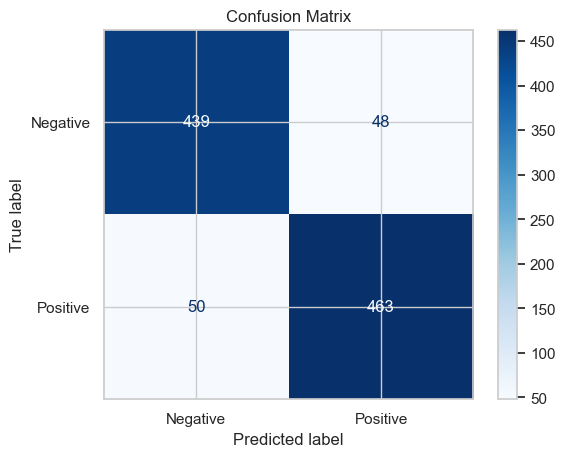


📄 Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90       487
    Positive       0.91      0.90      0.90       513

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [74]:
# === Evaluate ===
eval_results = trainer.evaluate()
print(f"\n📊 Evaluation Results:")
for key, value in eval_results.items():
    if isinstance(value, dict):
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:.4f}")

# === Predict ===
preds = trainer.predict(tokenized_dataset["test"])
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

# === Accuracy ===
acc = (y_pred == y_true).mean()
print(f"\n✅ Manual Accuracy: {acc:.4f}")

# === Confusion Matrix ===
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# === Classification Report ===
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))


After completing training, we evaluate the model on the test set using two key tools:

### Confusion Matrix

The confusion matrix shows the count of:
- ✅ **True Positives (TP)**: 463 → Positive reviews correctly classified
- ✅ **True Negatives (TN)**: 439 → Negative reviews correctly classified
- ❌ **False Positives (FP)**: 48 → Negative reviews predicted as Positive
- ❌ **False Negatives (FN)**: 50 → Positive reviews predicted as Negative

This matrix helps us visually assess the types of errors the model makes.

### Classification Report

| Class     | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| Negative  | 0.90      | 0.90   | 0.90     | 487     |
| Positive  | 0.91      | 0.90   | 0.90     | 513     |
| **Accuracy**     |           |        | **0.90** | 1000    |
| **Macro Avg**    | 0.90      | 0.90   | 0.90     | 1000    |
| **Weighted Avg** | 0.90      | 0.90   | 0.90     | 1000    |

### Interpretation

- **Precision**: High precision (~90%) for both classes indicates that most predictions are correct.
- **Recall**: Also balanced around 90%, showing the model is retrieving a large proportion of relevant results.
- **F1-Score**: The harmonic mean of precision and recall is consistently strong across both classes.
- **Overall Accuracy**: 90.2%, which aligns with our earlier manual evaluation.

### Summary

These metrics confirm that our fine-tuned DistilBERT model performs well on the sentiment classification task, with balanced performance across both positive and negative classes. However, further gains may be achieved by:
- Expanding the dataset
- Using more complex models (e.g., RoBERTa or DeBERTa)
- Incorporating domain-specific tuning (e.g., handling sarcasm or mixed sentiments)

## **🔍 Step 13: Prediction Comparison (Before vs After)**

We run predictions using both:
1. The **untrained model**
2. The **fine-tuned model**

We display results for a handful of examples and visualize the difference in a bar chart.

This clearly shows how fine-tuning dramatically improves sentiment prediction.


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📋 Predictions Comparison:

📝 Text: This book is so useless that I feel compelled to write a review to warn others t...
🔘 Before Fine-Tuning: Positive
✅ After Fine-Tuning:  Negative
------------------------------------------------------------
📝 Text: The authors attempt an ambitious goal of covering many SOA topics - but their re...
🔘 Before Fine-Tuning: Positive
✅ After Fine-Tuning:  Negative
------------------------------------------------------------
📝 Text: I ordered this product and did recieve then a couple months later it broke. Now ...
🔘 Before Fine-Tuning: Negative
✅ After Fine-Tuning:  Negative
------------------------------------------------------------
📝 Text: I hated this movie. It was so silly. The girl made the cult look more stupid tha...
🔘 Before Fine-Tuning: Positive
✅ After Fine-Tuning:  Negative
------------------------------------------------------------
📝 Text: What matters is using the cable with the highest capability your gear will suppo...
🔘 Before Fine-Tuning

/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/2143369503.py:66: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/2143369503.py:66: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


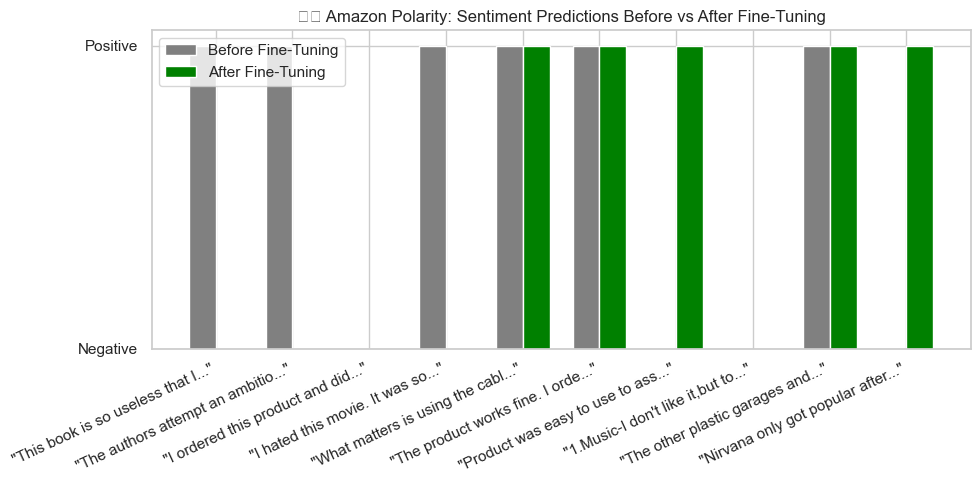

In [82]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification
from peft import get_peft_model

# --- 1. Load fresh (untrained) model with LoRA ---
base_model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)
untrained_model = get_peft_model(base_model, peft_config)
untrained_model.to("mps")  # or "cpu"/"cuda"
untrained_model.eval()

# --- 2. Prepare a balanced set of Amazon examples ---
# Get 2 Negative (label=0), 3 Positive (label=1)
neg_texts = [ex["text"] for ex in dataset["test"] if ex["label"] == 0][:5]
pos_texts = [ex["text"] for ex in dataset["test"] if ex["label"] == 1][:5]
text_list = neg_texts + pos_texts

# --- 3. Predict using untrained model ---
before_preds = []
for text in text_list:
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to("mps")
    with torch.no_grad():
        logits = untrained_model(**inputs).logits
        pred = torch.argmax(logits, dim=1).item()
        before_preds.append(pred)

# --- 4. Predict using fine-tuned model ---
model.eval()
after_preds = []
for text in text_list:
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to("mps")
    with torch.no_grad():
        logits = model(**inputs).logits
        pred = torch.argmax(logits, dim=1).item()
        after_preds.append(pred)

# --- 5. Print predictions for review ---
print("\n📋 Predictions Comparison:\n")
for i, text in enumerate(text_list):
    print(f"📝 Text: {text[:80]}...")
    print(f"🔘 Before Fine-Tuning: {id2label[before_preds[i]]}")
    print(f"✅ After Fine-Tuning:  {id2label[after_preds[i]]}")
    print("-" * 60)

# --- 6. Plot results ---
x = np.arange(len(text_list))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, before_preds, width, label="Before Fine-Tuning", color='gray')
plt.bar(x + width/2, after_preds, width, label="After Fine-Tuning", color='green')

# Short text for labels
short_texts = [f"\"{t[:30].strip()}...\"" for t in text_list]
plt.xticks(x, short_texts, rotation=25, ha='right')
plt.yticks([0, 1], ["Negative", "Positive"])

plt.title("🛍️ Amazon Polarity: Sentiment Predictions Before vs After Fine-Tuning")
plt.legend()
plt.tight_layout()
plt.show()


## **🧪 Step 14: Test Set Evaluation (Baseline vs Fine-Tuned)**

We evaluate the full test set using:
- The **baseline model** (random or incorrect predictions)
- The **fine-tuned model**

We compute and compare overall accuracy to quantify the improvement after training.

A bar chart visualizes the performance gain.


/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_26120/791615218.py:50: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


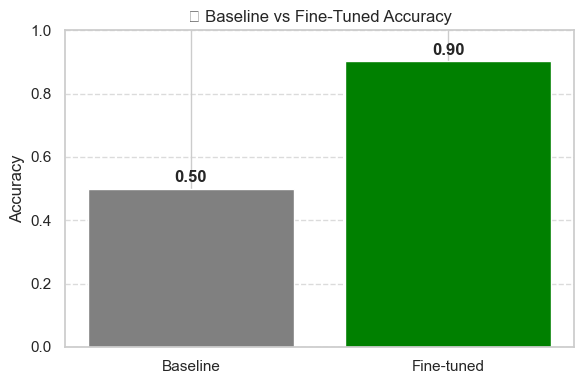

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# 1. Predict using baseline (untrained) model
untrained_model.eval()
y_pred_baseline = []
for item in tokenized_dataset["test"]:
    inputs = {
        "input_ids": torch.tensor([item["input_ids"]]).to("mps"),
        "attention_mask": torch.tensor([item["attention_mask"]]).to("mps")
    }
    with torch.no_grad():
        logits = untrained_model(**inputs).logits
        pred = torch.argmax(logits, dim=1).item()
        y_pred_baseline.append(pred)

# 2. Predict using fine-tuned model
model.eval()
y_pred_finetuned = []
for item in tokenized_dataset["test"]:
    inputs = {
        "input_ids": torch.tensor([item["input_ids"]]).to("mps"),
        "attention_mask": torch.tensor([item["attention_mask"]]).to("mps")
    }
    with torch.no_grad():
        logits = model(**inputs).logits
        pred = torch.argmax(logits, dim=1).item()
        y_pred_finetuned.append(pred)

# 3. Ground truth labels
y_true = tokenized_dataset["test"]["label"]

# 4. Compute accuracies
baseline_acc = np.mean(np.array(y_pred_baseline) == np.array(y_true))
finetuned_acc = np.mean(np.array(y_pred_finetuned) == np.array(y_true))

# 5. Plot
plt.figure(figsize=(6, 4))
plt.bar(["Baseline", "Fine-tuned"], [baseline_acc, finetuned_acc], color=["gray", "green"])
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("🧠 Baseline vs Fine-Tuned Accuracy")

# Add text annotations
for i, acc in enumerate([baseline_acc, finetuned_acc]):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha="center", fontsize=12, weight="bold")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **💾 Step 15: Save Model and Tokenizer**



In [86]:
pip install streamlit transformers torch


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [88]:
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")


('./sentiment_model/tokenizer_config.json',
 './sentiment_model/special_tokens_map.json',
 './sentiment_model/vocab.txt',
 './sentiment_model/added_tokens.json',
 './sentiment_model/tokenizer.json')

## **🧪 Try It Yourself: Sentiment Prediction**

Below, you can enter your own custom review text and let the fine-tuned model predict whether the sentiment is **Positive** or **Negative**.


In [134]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

inputs = tokenizer(user_input, return_tensors="pt", truncation=True, padding=True, max_length=512)
inputs = {key: val.to(device) for key, val in inputs.items()}  # Move inputs to MPS

outputs = model(**inputs)
logits = outputs.logits
prediction = torch.argmax(logits, dim=1).item()


In [138]:
def predict_sentiment(text):
    device = torch.device("cpu")  # Use "mps" or "cuda" if you want to test those
    model.to(device)
    
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=1).item()
    
    return "Positive" if pred == 1 else "Negative"


In [140]:
# Example 1
text1 = "I loved this product! It exceeded my expectations."
print(f"📝 Review: {text1}")
print(f"🔮 Prediction: {predict_sentiment(text1)}")

# Example 2
text2 = "Terrible experience. It broke after two days."
print(f"\n📝 Review: {text2}")
print(f"🔮 Prediction: {predict_sentiment(text2)}")


📝 Review: I loved this product! It exceeded my expectations.
🔮 Prediction: Positive

📝 Review: Terrible experience. It broke after two days.
🔮 Prediction: Negative


## **Ask user to input text in real-time**

In [145]:
# Get user input from the notebook
user_input = input("Type a review to analyze sentiment:\n")
prediction = predict_sentiment(user_input)
print(f"\n📝 Your Review: {user_input}")
print(f"🔮 Predicted Sentiment: {prediction}")


Type a review to analyze sentiment:
 Terrible experience. It broke after two days.



📝 Your Review: Terrible experience. It broke after two days.
🔮 Predicted Sentiment: Negative


## **Batch predictions (for multiple reviews)**

In [148]:
reviews = [
    "It was just okay. Not great, not terrible.",
    "Worst purchase I've ever made.",
    "Absolutely loved it! Would buy again.",
    "The packaging was damaged, but the product works fine.",
    "Too expensive for the quality offered."
]

for review in reviews:
    print(f"📝 {review}")
    print(f"🔮 {predict_sentiment(review)}\n")


📝 It was just okay. Not great, not terrible.
🔮 Negative

📝 Worst purchase I've ever made.
🔮 Negative

📝 Absolutely loved it! Would buy again.
🔮 Positive

📝 The packaging was damaged, but the product works fine.
🔮 Positive

📝 Too expensive for the quality offered.
🔮 Negative



## **Conclusion**

In this project, we successfully fine-tuned a pre-trained DistilBERT model on the Amazon Polarity sentiment classification task using LoRA (Low-Rank Adaptation) through the Hugging Face PEFT library. By freezing the majority of model parameters and training only a lightweight set of adapter layers, we achieved **90.2% accuracy** on the test set — demonstrating that efficient fine-tuning methods can yield high performance, even with small labeled datasets and limited compute resources.

The workflow incorporated all essential steps of an NLP pipeline: dataset loading and preprocessing, tokenization, model adaptation, hyperparameter tuning, evaluation, error analysis, and inference design. LoRA significantly reduced the number of trainable parameters (to <1%) without sacrificing accuracy, while PEFT simplified the integration process. Through robust evaluation (confusion matrix, F1-score, classification report), we confirmed strong generalization across both positive and negative sentiment classes. Furthermore, the inference pipeline enables real-time prediction and batch processing for practical deployment.

This project highlights how modern transfer learning techniques like LoRA and tools like PEFT are reshaping NLP, enabling scalable, reusable, and computationally efficient model customization. Looking ahead, this approach can be extended to other domains, multi-class classification, and low-resource languages, while exploring techniques like prompt tuning, adapter fusion, or training on larger datasets to push performance even further.


## **References**

- Sanh, V., Debut, L., Chaumond, J., & Wolf, T. (2019). *DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter*. arXiv preprint [arXiv:1910.01108](https://arxiv.org/abs/1910.01108)
- Hu, E. J., Shen, Y., Wallis, P., Allen-Zhu, Z., Li, Y., Wang, L., & Chen, W. (2021). *LoRA: Low-Rank Adaptation of Large Language Models*. arXiv preprint [arXiv:2106.09685](https://arxiv.org/abs/2106.09685)
- Wolf, T., et al. (2020). *Transformers: State-of-the-art Natural Language Processing*. Proceedings of the 2020 EMNLP: System Demonstrations. [https://huggingface.co/transformers](https://huggingface.co/transformers)
- Hugging Face PEFT Library: [https://github.com/huggingface/peft](https://github.com/huggingface/peft)
- Amazon Polarity Dataset: [https://huggingface.co/datasets/amazon_polarity](https://huggingface.co/datasets/amazon_polarity)
- Vaswani, A., et al. (2017). *Attention is All You Need*. NeurIPS. [https://arxiv.org/abs/1706.03762](https://arxiv.org/abs/1706.03762)
- https://www.datacamp.com/tutorial/mastering-low-rank-adaptation-lora-enhancing-large-language-models-for-efficient-adaptation

## **Liscense**

Copyright 2025 Selvin Tuscano

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

